In [55]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [56]:

songList = pd.read_csv( "lyrics_small_cleaned.csv", index_col=0 )

#songList = songList.replace({'\n': ' '}, regex=True)

songList

,year,artist,genre,lyrics,cleaned_lyrics,lang
song,,,,,,
you-re-dead-to-me,2010,dierks-bentley,Country,Well come on in and sit right down\nSurprised ...,well come on in and sit right down surprised t...,en
big-ideas,2016,the-boxer-rebellion,Rock,Big ideas\nFor the first time in my life I hav...,big ideas for the first time in my life i have...,en
dime,2007,anna-carina,Pop,Dices no estoy en tu razn\nEn tus recuerdos ni...,dices no estoy en tu razn en tus recuerdos ni ...,es
i-feel-good,2012,fred-hammond,Not Available,"Now it's time to ease your mind, so hear me as...",now it s time to ease your mind so hear me as ...,en
last-dance,2012,avicii,Electronic,"If this is our last, last dance\nMove a bit cl...",if this is our last last dance move a bit clos...,en
here-i-am,2007,altaria,Metal,Working hard all day\nTo control the final dre...,working hard all day to control the final drea...,en
blood-from-a-stone,2006,dio,Rock,"Oh, you've been surprised again\nPulled like a...",oh you ve been surprised again pulled like a l...,en
mrthbel-model,2006,die-doofen,Not Available,Es war an einem Sonntag bei Kaffee und Konfekt...,es war an einem sonntag bei kaffee und konfekt...,de
words,2007,clear-convictions,Not Available,death and life are in the power of\nthe tongue...,death and life are in the power of the tongue ...,en


In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/radhika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /Users/radhika/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [60]:
import re
from nltk.corpus import stopwords

def lyrics_cleaner(lyrics):
    
    # Extract only characters
    lyrics = re.sub("[^a-zA-Z]", " ", lyrics)
    
    # Tokenize into words (all lower case)
    lyrics = lyrics.lower().split()
    
    # Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    lyrics = [word for word in lyrics if not word in eng_stopwords]
    
    # Join the review to one sentence
    lyrics = ' '.join(lyrics)
    
    return lyrics

In [61]:
%%time

songList['cleaned_lyrics'] = songList['cleaned_lyrics'].apply(lyrics_cleaner)

songList

CPU times: user 4.77 s, sys: 507 ms, total: 5.28 s
Wall time: 5.33 s


,year,artist,genre,lyrics,cleaned_lyrics,lang
song,,,,,,
you-re-dead-to-me,2010,dierks-bentley,Country,Well come on in and sit right down\nSurprised ...,well come sit right surprised see still around...,en
big-ideas,2016,the-boxer-rebellion,Rock,Big ideas\nFor the first time in my life I hav...,big ideas first time life seen relevance love ...,en
dime,2007,anna-carina,Pop,Dices no estoy en tu razn\nEn tus recuerdos ni...,dices estoy en tu razn en tus recuerdos ni son...,es
i-feel-good,2012,fred-hammond,Not Available,"Now it's time to ease your mind, so hear me as...",time ease mind hear say life always see hey su...,en
last-dance,2012,avicii,Electronic,"If this is our last, last dance\nMove a bit cl...",last last dance move bit closer let take final...,en
here-i-am,2007,altaria,Metal,Working hard all day\nTo control the final dre...,working hard day control final dream side side...,en
blood-from-a-stone,2006,dio,Rock,"Oh, you've been surprised again\nPulled like a...",oh surprised pulled like leaf waterfall everyb...,en
mrthbel-model,2006,die-doofen,Not Available,Es war an einem Sonntag bei Kaffee und Konfekt...,es war einem sonntag bei kaffee und konfekt ic...,de
words,2007,clear-convictions,Not Available,death and life are in the power of\nthe tongue...,death life power tongue little boasts great th...,en


In [62]:
reindexed_data = songList['cleaned_lyrics']

In [63]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=1000, random_state=0).values

print('Lyrics before vectorization: \n{}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('\nLyrics after vectorization: \n{}'.format(small_document_term_matrix[123]))

Lyrics before vectorization: 
image try keep follow trends society breed scared showing real inside fool jump bandwagon listen stuff go meet fashion friends drop dead trendy dance might possess everything nice cut hair means girls win one thing see lack personality important guess want living show beneath mask

Lyrics after vectorization: 
  (0, 6573)	1
  (0, 10565)	1
  (0, 13225)	1
  (0, 13670)	1
  (0, 14386)	1
  (0, 8869)	1
  (0, 5800)	1
  (0, 3006)	1
  (0, 4880)	1
  (0, 12156)	1
  (0, 5692)	1
  (0, 7595)	1
  (0, 8111)	1
  (0, 5408)	1
  (0, 5037)	1
  (0, 4895)	1
  (0, 8086)	1
  (0, 3148)	1
  (0, 3831)	1
  (0, 7612)	1
  (0, 1103)	1
  (0, 6917)	1
  (0, 12674)	1
  (0, 3065)	1
  (0, 11350)	1
  (0, 6426)	1
  (0, 13596)	1
  (0, 1534)	1
  (0, 11777)	1
  (0, 888)	1
  (0, 4578)	1
  (0, 13598)	1
  (0, 9962)	1
  (0, 14641)	1
  (0, 7239)	1
  (0, 9631)	1
  (0, 6460)	1
  (0, 8019)	1


In [64]:
small_document_term_matrix.shape

(1000, 14993)

In [65]:
n_topics = 8

In [66]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [67]:
vocab = np.array(lsa_topic_matrix)
print(vocab.shape)
vocab[3000:3050]

(1000, 8)


array([], shape=(0, 8), dtype=float64)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize,stem
import re

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = stem.WordNetLemmatizer()
    def __call__(self, doc):
        SYMBOLS_TO_KEEP = re.compile('[^A-Za-z0-9]+')
        doc = re.sub(SYMBOLS_TO_KEEP," ",doc)
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if (len(t) >3)]

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
						     lowercase=True,  
                             max_df = 0.9,
                             min_df =5)

# We could have used TfidfVectorizer() instead



In [69]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/radhika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
vectors = vectorizer.fit_transform(songList['cleaned_lyrics']).todense()
vectors.shape

(26529, 18829)

In [71]:
vocab = np.array(vectorizer.get_feature_names())
print(vocab.shape)
vocab[3000:3050]

(18829,)


array(['clingin', 'clinging', 'clinic', 'clinical', 'clint', 'clinton',
       'clip', 'clipped', 'clipper', 'clippin', 'clipping', 'clique',
       'clit', 'clitoris', 'cloak', 'cloaked', 'clock', 'clocked',
       'clockin', 'clocking', 'clockwork', 'clog', 'clone', 'cloned',
       'close', 'closed', 'closely', 'closer', 'closest', 'closet',
       'closin', 'closing', 'closure', 'clot', 'cloth', 'clothe',
       'clothed', 'clothes', 'clothing', 'cloud', 'clouded', 'clouding',
       'cloudless', 'cloudy', 'clout', 'cloven', 'clover', 'clown',
       'clownin', 'club'], dtype='<U16')

In [72]:
#conda install -c conda-forge scipy

In [73]:
import scipy

In [74]:
from scipy import linalg

In [75]:
from scipy import linalg

%time U, s, Vh = linalg.svd(vectors, full_matrices=True)
print(U.shape, s.shape, Vh.shape, vocab.shape)

CPU times: user 2h 36min 7s, sys: 5min 7s, total: 2h 41min 15s
Wall time: 29min 1s
(26529, 26529) (18829,) (18829, 18829) (18829,)


0

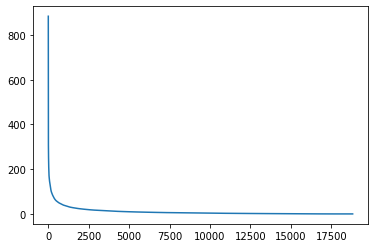

In [76]:
plt.plot(s);
sum(s<0)

In [77]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])


['instru zaman seninle daha masih biar sini meit',
 'love baby heart need fall sweet true woah',
 'know time never baby away come take want',
 'like yeah baby girl come feel back night',
 'like know love never life away feel world',
 'like know baby yeah girl love gimmie shake',
 'baby want like girl come make need gimmie',
 'baby time never nigga world back away know',
 'come gimmie know back home love tonight night',
 'come like baby feel know want home yeah']